# 04-2 확률적 경사 하강법
### 경사 하강법 알고리즘 이해 및 대량의 데이터에서 분류 모델을 훈련시키는 방법
---
</br>

💡용어 정리💡  
❓ 점진적 학습 ➡️ 앞서 훈련한 모델을 버리지 않고, 새로운 데이터에 대해서만 조금씩 더 훈련하는 학습법  
 --> ex) 확률적 경사 하강법 (Stochastic Gradient Descent)  
❓ 손실 함수(loss function) ➡️ 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준  
 --> 손실 함수의 값이 낮을수록 좋음! **(비용함수와-cost function 혼용하여 사용함)** 

- 경사 하강법의 훈련 과정??  
 훈련세트에서 샘플 꺼내기 -> 조금씩 경사를 따라 이동 -> 반복 -> 샘플 모두 소진 -> 1에포크 완료  
 1. 훈련세트에서 샘플을 1개씩 꺼내기 --> 확률적 경사 하강법  
 2. 훈련세트에서 샘플을 여러 개씩 꺼내기 --> 미니배치 경사 하강법  
 3. 훈련세트에서 샘플을 몽땅 꺼내기 --> 배치 경사 하강법  
 (신경망 알고리즘과 같이 사용한다는 점 기억하기‼️)   

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

**훈련 세트와 테스트 세트의 특성을 표준화 전처리**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- SGDClassifier() 매개변수??  
 1. loss --> 손실 함수의 종류 지정  
 2. loss='log' --> 로지스틱 손실 함수 지정  
 3. max_iter --> 수행 할 에포크 횟수 지정  

In [ ]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# ConvergenceWarning --> 모델이 충분히 수렴하지 않음! 더 충분한 학습 필요함

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


**이어서 모델 훈련**

In [ ]:
# 객체를 다시 만들지 않고, 훈련한 모델을 이어서 훈련!
# partial_fit() --> 호출할 때마다 1 에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)

# 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위한 리스트
train_score = []
test_score = []

# partial_fit()의 매개변수로 넘기기 위해서 훈련 세트 타깃값을 목록으로 생성
classes = np.unique(train_target)

In [ ]:
# 에포크 300번 반복
# _ 변수 --> 사용하지 않고 버리게되는 값을 넣어두는 용도로 사용!
# 여기에서는 0~299까지 반복횟수를 임시 저장함
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)

  # 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 각각의 리스트에 추가함
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

**그래프 생성**
- 과소적합도 아니고 과대적합이 아닌 적당한 값을 찾는게 중요!!  
 --> 아래 그래프에서는 100 에포크 정도가 적당함  

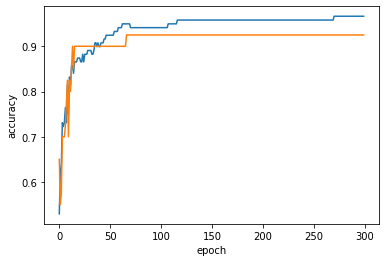

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score) # 파랑색 선
plt.plot(test_score) # 주황색 선 

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [ ]:
# SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 자동멈춤!
# tol --> 향상될 최솟값 지정
# tol=None --> 최솟값을 지정하지 않아 자동으로 멈추지 않고, max_iter=100 만큼 무조건 반복
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)

# 모델 훈련
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [ ]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


**힌지 손실 사용**
- 힌지 손실?? 서포트 벡터 머신이라 불리는 손실 함수의 일종  

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)

# 모델 훈련
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
